In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

    
for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [11]:
i = Input(shape=(T, ))
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(i)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01),
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])
r = model.fit(x=X, y=Y, 
              epochs=100, 
              validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 3s 8ms/step - loss: 0.8002 - accuracy: 0.4780 - val_loss: 0.7002 - val_accuracy: 0.4988
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4797 - val_loss: 0.6942 - val_accuracy: 0.4756
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4899 - val_loss: 0.6940 - val_accuracy: 0.5140
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5126 - val_loss: 0.6937 - val_accuracy: 0.5120
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5094 - val_loss: 0.6929 - val_accuracy: 0.5032
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.4964 - val_loss: 0.6935 - val_accuracy: 0.5012
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4727 - val_loss: 0.6943 - val_accuracy: 0.5044
Epoch 8/100
7

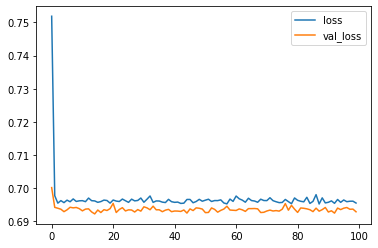

In [12]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

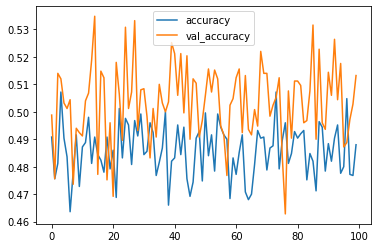

In [13]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [14]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = SimpleRNN(units=5, activation=tf.keras.activations.sigmoid)(i)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=inputs, y=Y, 
              epochs=200, 
              validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.7065 - accuracy: 0.4945 - val_loss: 0.6936 - val_accuracy: 0.5068
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6943 - accuracy: 0.5115 - val_loss: 0.6958 - val_accuracy: 0.5004
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6953 - accuracy: 0.5103 - val_loss: 0.6945 - val_accuracy: 0.5004
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6934 - accuracy: 0.5148 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6945 - accuracy: 0.4937 - val_loss: 0.6935 - val_accuracy: 0.5268
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6952 - accuracy: 0.4951 - val_loss: 0.6949 - val_accuracy: 0.5004
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6948 - accuracy: 0.4798 - val_loss: 0.6932 - val_accuracy: 0.4996
Epoch 

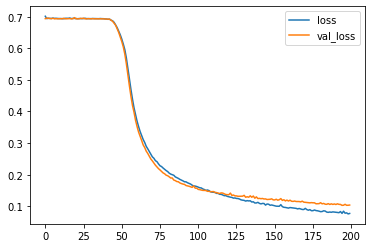

In [15]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

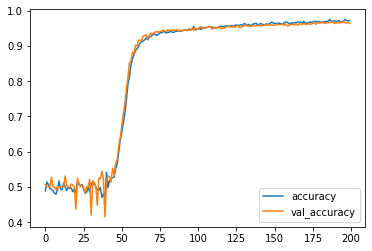

In [16]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [17]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

    
for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [18]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = SimpleRNN(units=5, activation=tf.keras.activations.sigmoid)(i)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=inputs, y=Y, 
              epochs=200, 
              validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.6970 - accuracy: 0.4667 - val_loss: 0.6937 - val_accuracy: 0.5072
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6940 - accuracy: 0.5132 - val_loss: 0.6939 - val_accuracy: 0.5072
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6942 - accuracy: 0.5195 - val_loss: 0.6954 - val_accuracy: 0.5072
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.5085 - val_loss: 0.6950 - val_accuracy: 0.4928
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6944 - accuracy: 0.4924 - val_loss: 0.6937 - val_accuracy: 0.4876
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6944 - accuracy: 0.4872 - val_loss: 0.6935 - val_accuracy: 0.5032
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6948 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 

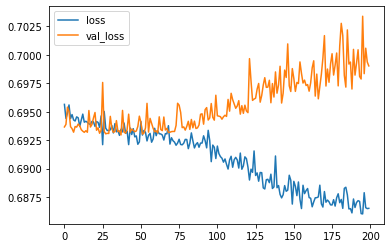

In [19]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

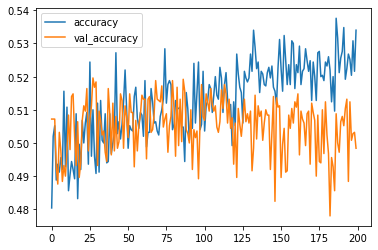

In [20]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [21]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(units=5)(i)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy,
              metrics=["accuracy"])

r = model.fit(x=inputs, y=Y, 
              epochs=200,
              validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 6s 10ms/step - loss: 0.6958 - accuracy: 0.5142 - val_loss: 0.6933 - val_accuracy: 0.5068
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.4843 - val_loss: 0.6934 - val_accuracy: 0.5096
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5112 - val_loss: 0.6933 - val_accuracy: 0.5008
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5132 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.4835 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5119 - val_loss: 0.6934 - val_accuracy: 0.5072
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5161 - val_loss: 0.6932 - val_accuracy: 0.5152
Epoch 8/200


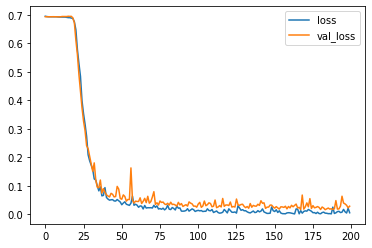

In [22]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

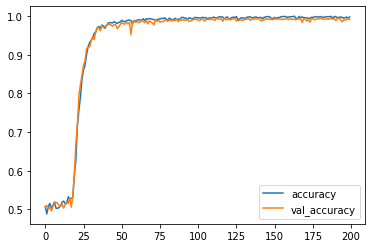

In [23]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [24]:
T = 20
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [25]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = SimpleRNN(units=5, activation=tf.keras.activations.sigmoid)(i)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])
r = model.fit(x=inputs, y=Y, 
              epochs=200, 
              validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 2s 18ms/step - loss: 0.6931 - accuracy: 0.5279 - val_loss: 0.6935 - val_accuracy: 0.5008
Epoch 2/200
79/79 [==============================] - 1s 19ms/step - loss: 0.6932 - accuracy: 0.5088 - val_loss: 0.6936 - val_accuracy: 0.5044
Epoch 3/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6938 - accuracy: 0.5040 - val_loss: 0.6969 - val_accuracy: 0.4868
Epoch 4/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6916 - accuracy: 0.5314 - val_loss: 0.6965 - val_accuracy: 0.4868
Epoch 5/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6919 - accuracy: 0.5242 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 6/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6934 - accuracy: 0.5072 - val_loss: 0.6965 - val_accuracy: 0.4860
Epoch 7/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6913 - accuracy: 0.5307 - val_loss: 0.6938 - val_accuracy: 0.4964
Epoch 

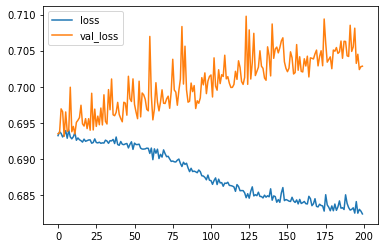

In [28]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

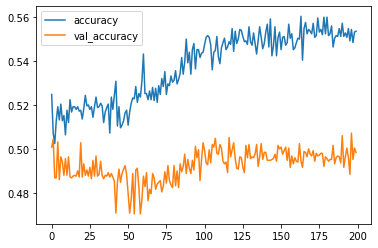

In [29]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [34]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(units=5)(i)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=inputs, y=Y, 
              epochs=200, 
              validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.6953 - accuracy: 0.4668 - val_loss: 0.6988 - val_accuracy: 0.4880
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5224 - val_loss: 0.6967 - val_accuracy: 0.4880
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5178 - val_loss: 0.6962 - val_accuracy: 0.4880
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5329 - val_loss: 0.6941 - val_accuracy: 0.4928
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5159 - val_loss: 0.6948 - val_accuracy: 0.4880
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5315 - val_loss: 0.6939 - val_accuracy: 0.4896
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5054 - val_loss: 0.6954 - val_accuracy: 0.4888
Epoch 8/200


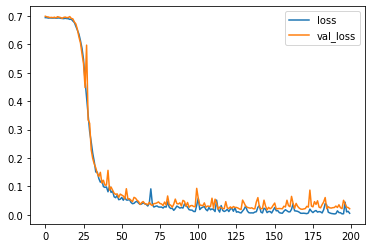

In [35]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

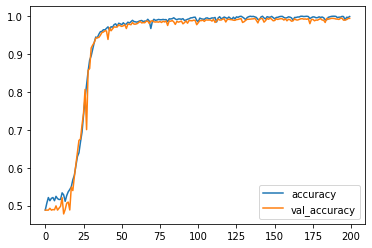

In [36]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [41]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = GRU(units=5)(i)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=inputs, y=Y, 
              epochs=400, 
              validation_split=0.5)

Epoch 1/400
79/79 [==============================] - 2s 10ms/step - loss: 0.6976 - accuracy: 0.4919 - val_loss: 0.6959 - val_accuracy: 0.4912
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5181 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4947 - val_loss: 0.6967 - val_accuracy: 0.4924
Epoch 4/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5143 - val_loss: 0.6999 - val_accuracy: 0.4876
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5271 - val_loss: 0.6948 - val_accuracy: 0.4956
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5352 - val_loss: 0.6959 - val_accuracy: 0.4904
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5381 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 8/400


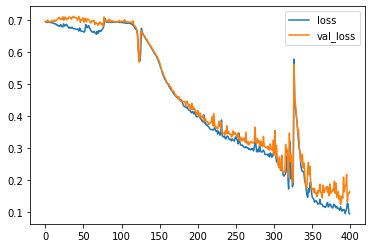

In [42]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

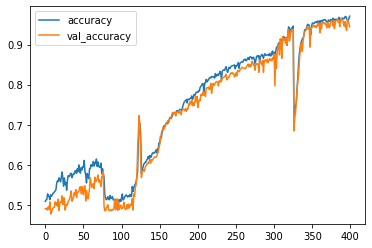

In [43]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [44]:
T = 30
X = []
Y = []

for _ in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [46]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(units=5)(i)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=inputs, y=Y, 
              epochs=400, 
              validation_split=0.5)

Epoch 1/400
79/79 [==============================] - 2s 11ms/step - loss: 0.6937 - accuracy: 0.4994 - val_loss: 0.6930 - val_accuracy: 0.5140
Epoch 2/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5052 - val_loss: 0.6933 - val_accuracy: 0.5096
Epoch 3/400
79/79 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.4945 - val_loss: 0.6934 - val_accuracy: 0.5124
Epoch 4/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5067 - val_loss: 0.6942 - val_accuracy: 0.4716
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4912 - val_loss: 0.6933 - val_accuracy: 0.5176
Epoch 6/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6940 - accuracy: 0.4871 - val_loss: 0.6938 - val_accuracy: 0.5052
Epoch 7/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5153 - val_loss: 0.6937 - val_accuracy: 0.5008
Epoch 8/400


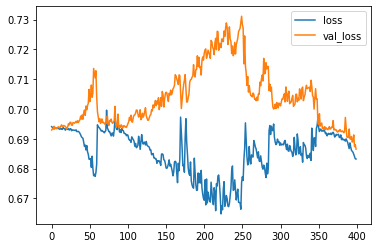

In [47]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

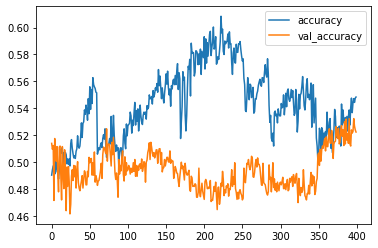

In [48]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [49]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(units=5, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(units=1, activation=tf.keras.activations.sigmoid)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.01), 
              loss=tf.keras.losses.binary_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=inputs, y=Y, 
              epochs=100, 
              validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 2s 11ms/step - loss: 0.6940 - accuracy: 0.5009 - val_loss: 0.6928 - val_accuracy: 0.5160
Epoch 2/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5093 - val_loss: 0.6942 - val_accuracy: 0.4868
Epoch 3/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6930 - accuracy: 0.5032 - val_loss: 0.6926 - val_accuracy: 0.5168
Epoch 4/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.5138 - val_loss: 0.6925 - val_accuracy: 0.5148
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5172 - val_loss: 0.6960 - val_accuracy: 0.5144
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5229 - val_loss: 0.6923 - val_accuracy: 0.5260
Epoch 7/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6958 - accuracy: 0.5026 - val_loss: 0.6920 - val_accuracy: 0.5292
Epoch 8/100


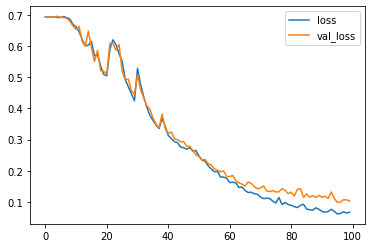

In [50]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

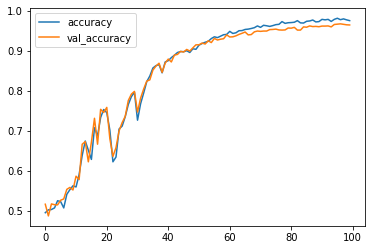

In [51]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()